In [369]:
import numpy as np

In [370]:
import pandas as pd

In [371]:
import matplotlib.pyplot as plt

In [372]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [373]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## Data Preprocessing

In [374]:
data.shape

(7920, 3)

In [375]:
data.duplicated().sum()

np.int64(0)

In [376]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Text Preprocessing

In [377]:
import re
import string

convert uppercase to lower case

In [378]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [379]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [380]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [381]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','',x,flags=re.MULTILINE) for x in x.split()))

In [382]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [383]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [384]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [385]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

remove numbers

In [386]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [387]:
data["tweet"] = data["tweet"].str.replace(r'\d+','',regex=True)

In [388]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stop words

In [389]:
!pip install nltk


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [390]:
import nltk

In [391]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [392]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [393]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [394]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [395]:
data["tweet"].head(5)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

stemming

In [396]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [397]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [398]:
data["tweet"].head(5)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [399]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


### Building Vocabulary

In [400]:
from collections import Counter 
vocab =Counter()

In [401]:
vocab

Counter()

In [402]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())

In [403]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [404]:
len(vocab)

15949

In [405]:
tokens = [key for key in vocab if vocab[key]>10]

In [406]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [407]:
len(tokens)

1145

In [408]:
def save_vocabulary(lines,filename):
    data='\n'.join(lines)
    file=open(filename,'w',encoding="utf-8")
    file.write(data)
    file.close()
save_vocabulary(tokens,'../static/model/vocabulary.txt ')

### Divide dataset

In [409]:
X = data['tweet']
y = data['label']

In [410]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [411]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [412]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

In [413]:
X_train.shape

(6336,)

In [414]:
X_test.shape

(1584,)

### Vectorization

In [415]:
X_train

6400    gain follow rt must follow follow back follow ...
6558    itun window screw machin app stuck kill everyt...
6744    purupuru download app find nearest pinkberri i...
3523    real truck time april snow windi tmobil samsun...
5236    good life pet iphoneographi iphon blackandwhit...
                              ...                        
2824    big appl dessert delici appl bigappl doughnut ...
896     wifi hake password android app unitedst cute c...
1260    everi morn sin falta mochaccino stringchees ap...
6191    see beauti ugli sad mm sonyalpha soni woman wo...
3219    samsung sale super prompt came n fix fridg fre...
Name: tweet, Length: 6336, dtype: object

In [416]:
X_test

4746    check wireless bluetooth headphon wireless spo...
5170    soni ericsson ji elm cheap g mobil phone unloc...
7094    appar up pick station dmv schedul waitingovera...
596     firstpres firstlov date penguin necklac jewelr...
5093    dashcam samsung galaxi failtub thatweb new yea...
                              ...                        
321     new oneyey babypink pink otterbox samsung phon...
7086    new laptop soni vaio eseri pink pretti technol...
1909     babi home new laptop appl mac inlov excit london
7092    would like wish amaz day make everi minut coun...
7458    hack wifi android app beauti cute color iger i...
Name: tweet, Length: 1584, dtype: object

In [417]:
import numpy as np

In [436]:
def vectorizer(ds,vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
               sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst,dtype=np.float32)

    return vectorized_lst_new

In [437]:
vectorized_x_train = vectorizer(X_train,tokens)

In [438]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [421]:
for i in vectorized_x_train[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [449]:
vectorized_x_test = vectorizer(X_test,tokens)

In [450]:
for i in vectorized_x_test[0]:
    print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0


In [451]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [439]:
print(vectorized_x_train.shape)

(6336, 1145)


In [426]:
y_train

6400    0
6558    1
6744    0
3523    0
5236    0
       ..
2824    0
896     0
1260    0
6191    0
3219    0
Name: label, Length: 6336, dtype: int64

In [427]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 1145), dtype=float32)

In [428]:
y_test

4746    0
5170    0
7094    1
596     0
5093    0
       ..
321     0
7086    0
1909    0
7092    0
7458    0
Name: label, Length: 1584, dtype: int64

In [429]:
y_train.value_counts()

label
0    4725
1    1611
Name: count, dtype: int64

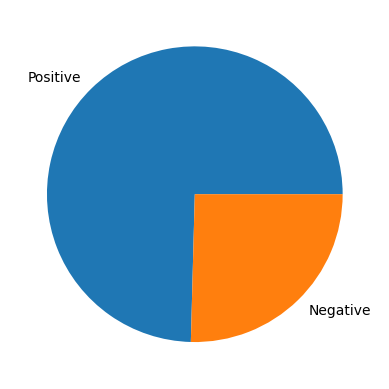

In [430]:
plt.pie(np.array([y_train.value_counts()[0],y_train.value_counts()[1]]),labels=['Positive','Negative'])
plt.show()

### Handle Imbalanced Dataset

In [431]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [440]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote,y_train_smote = smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape,y_train_smote.shape)

(9450, 1145) (9450,)


In [441]:
y_train_smote.value_counts()

label
0    4725
1    4725
Name: count, dtype: int64

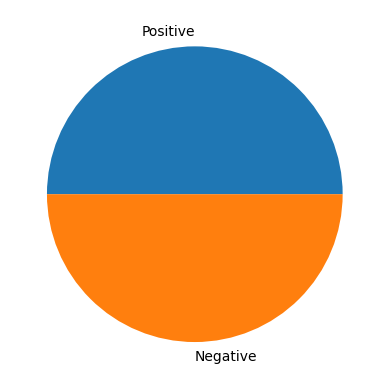

In [442]:
plt.pie(np.array([y_train_smote.value_counts()[0],y_train_smote.value_counts()[1]]),labels=['Positive','Negative'])
plt.show()

In [443]:
y_train_smote

0       0
1       1
2       0
3       0
4       0
       ..
9445    1
9446    1
9447    1
9448    1
9449    1
Name: label, Length: 9450, dtype: int64

In [444]:
X_train

6400    gain follow rt must follow follow back follow ...
6558    itun window screw machin app stuck kill everyt...
6744    purupuru download app find nearest pinkberri i...
3523    real truck time april snow windi tmobil samsun...
5236    good life pet iphoneographi iphon blackandwhit...
                              ...                        
2824    big appl dessert delici appl bigappl doughnut ...
896     wifi hake password android app unitedst cute c...
1260    everi morn sin falta mochaccino stringchees ap...
6191    see beauti ugli sad mm sonyalpha soni woman wo...
3219    samsung sale super prompt came n fix fridg fre...
Name: tweet, Length: 6336, dtype: object

In [447]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 1145), dtype=float32)

In [448]:
y_test

4746    0
5170    0
7094    1
596     0
5093    0
       ..
321     0
7086    0
1909    0
7092    0
7458    0
Name: label, Length: 1584, dtype: int64